# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
See below

#### b) Check out the columns present using one of R's data frame summary.  
See below

#### c) Get summary statistics on the numeric variables.  
See below

In [4]:
# 1a
wine <- read_csv("wine.csv")

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# 1b
glimpse(wine)

Rows: 178
Columns: 14
$ Alcohol                        <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.2…
$ Malicacid                      <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.8…
$ Ash                            <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.4…
$ Alcalinity_of_ash              <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.…
$ Magnesium                      <dbl> 127, 100, 101, 113, 118, 112, 96, 121, …
$ Total_phenols                  <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.5…
$ Flavanoids                     <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.5…
$ Nonflavanoid_phenols           <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.3…
$ Proanthocyanins                <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.9…
$ Color_intensity                <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.2…
$ Hue                            <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.0…
$ `0D280_0D315_of_diluted_wines` <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.5…
$ Proline         

In [6]:
# 1c
summary(wine)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

See below

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?
Per the summary statistics above, the quantitative variables are not on the same scales (medians range, for instance, from less than 1 to in the hundreds). Since we don't know the importance of various variables yet, we want all quantitative variables to be on the same scale relative to one another prior to rotating the data.


In [16]:
# 2a
scaledwine <- wine %>% 
  mutate(across(Alcohol:Proline, ~as.numeric(scale(.x))))

## Question 3

#### a) Perform PCA
See below

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?
See below; I used a summary function to determine that the SD for PC1 is 2.2798 and the SD for PC2 is 1.5802. Together, PC1 and PC2 explain the greatest amount of variance in the data.

#### c) Why are we doing PCA first?
PCA reduces our data down to the fewest dimensions needed while keeping the most meaningful data structure. The process reduces redundancy and information that is ultimately not needed.

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

See below

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

See below

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?
I see three rough clusters based on wine class. This plot indicates that reducing the data to two dimensions reveals distinctions in the three classes;
even with the information lost through dimensionality reduction, the three classes can still be roughly separated out.

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

PCA would fail if the data were completely symmetrical (in which case, rotation would not be much use), for example if the resulting plot looked like a symmetrical circle-shaped cloud.

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.
A vector space is linear; in a vector space, two vectors can be added to get a third vector. A manifold is a curved space, and is used for data for which it would be nonsensical to try to "add" two vectors. For PCA, a vector space is used or assumed. T-SNE does not assume a flat vector space and instead uses manifolds to identify where points lie close to one another (the "probability of two points being neighbors").

In [17]:
# 2a
pcawine <- prcomp(scaledwine)

In [9]:
# 2b
summary(pcawine)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

In [18]:
# 2d
R <- pcawine$rotation
R

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.139554110,-0.483986584,-0.2073937774,-0.05202454,0.26128775,0.16536102,0.08109663,0.41085968,-0.48056233,0.26657031,-0.22307817,-0.265240813,0.02620159,-0.082231639
Malicacid,0.231278771,-0.224052306,0.0888801156,0.50792619,0.09224016,0.58008658,-0.38986636,0.07811783,0.03061612,-0.32214644,0.07118746,0.120491970,-0.04853550,0.025647729
Ash,-0.000758731,-0.315929724,0.6261495205,-0.23483910,0.12056093,0.12592437,0.16145692,-0.17151142,0.28629906,-0.08144576,-0.49601658,-0.047383556,0.17320790,-0.014819695
Alcalinity_of_ash,0.230293094,0.011263089,0.6120248225,0.06750549,-0.05695664,-0.09534441,0.27494282,0.42011625,-0.15910053,0.11386621,0.47628860,-0.058460009,-0.15775842,0.099229101
Magnesium,-0.131041028,-0.300236426,0.1308963493,-0.25528136,-0.75961835,0.10479264,-0.32783323,-0.15219546,-0.26275246,0.10095846,0.07123668,0.061706989,-0.05861093,-0.013969977
Total_phenols,-0.372792367,-0.066404359,0.1463803150,0.19504272,0.14215523,-0.12544691,0.03482640,-0.38223991,-0.35387300,-0.32340394,0.29983404,-0.302432020,0.41707864,0.169545891
Flavanoids,-0.403237284,0.002017377,0.1508538950,0.14885364,0.10784345,-0.04674972,0.06557152,-0.18072307,-0.07250367,-0.15083796,-0.02996008,-0.046369111,-0.71106740,-0.452804254
Nonflavanoid_phenols,0.278847444,-0.027604752,0.1701277248,-0.27078415,0.47058669,-0.25340042,-0.60671679,-0.23206171,-0.17571862,0.23033372,0.12026342,0.042506815,-0.08908413,-0.058790535
Proanthocyanins,-0.291925075,-0.040561908,0.1497147503,0.43527140,-0.12361143,-0.49254225,-0.40687583,0.35471193,0.24105395,0.12403042,-0.23448023,-0.094480759,0.11423370,0.039562012
Color_intensity,0.089426322,-0.529856997,-0.1372817801,0.06919472,0.05497895,-0.42598886,0.19989161,-0.03762399,-0.06894372,-0.24930845,0.02389587,0.601198625,-0.08479641,0.160155281


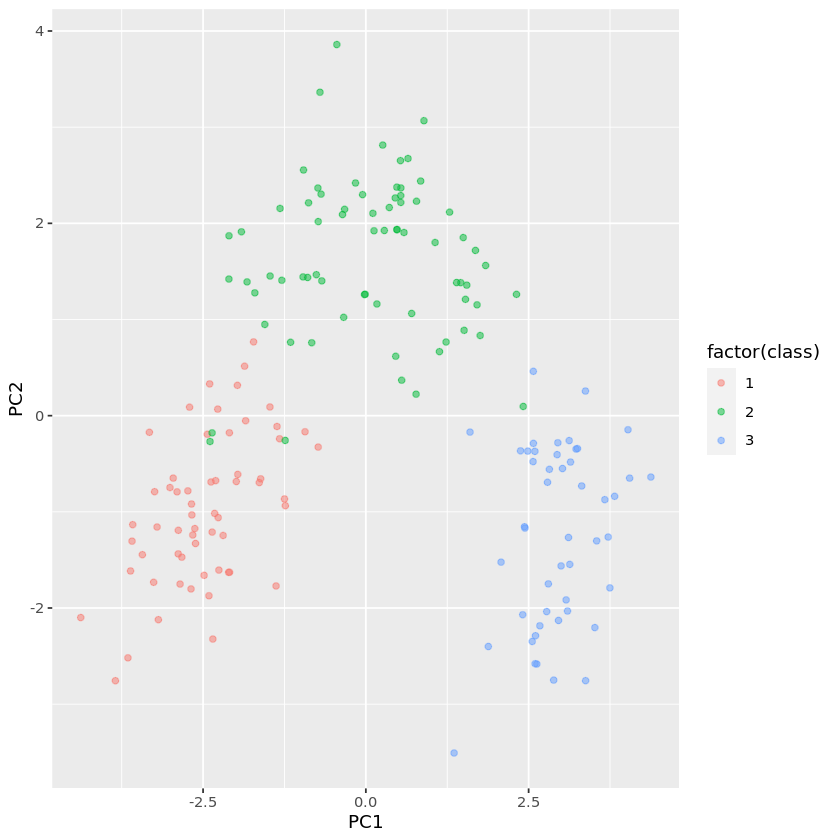

In [28]:
# 2e
pcawine_plot <- as_tibble(pcawine$x) %>%
  select(PC1:PC2) %>%
  mutate(class = wine$class) 

print(ggplot(pcawine_plot, aes(PC1, PC2)) +
  geom_point(aes(color=factor(class)),alpha=0.5))


## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

See below

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

See below

#### c) Why didn't we stop at PCA?
T-SNE allows for visualizing more complex data and does not assume linearity; it is primarily a visualization tool and is better at visualization than PCA alone, especially if the data exist in a curved space.

#### d) What other types of data does this workflow make sense for?
This would work for other data with non-linear relationships (such as where data lie on a manifold) or data with many dimensions.

In [33]:
# 2a
tsnewine <- as_tibble(pcawine$x) %>%
  select(PC1:PC10) %>%
  mutate(class = wine$class)

X <- tsnewine %>% select(-class) %>% as.matrix()

tsne_out <- Rtsne(X, dims = 2, perplexity = 30, verbose = FALSE, check_duplicates = FALSE)

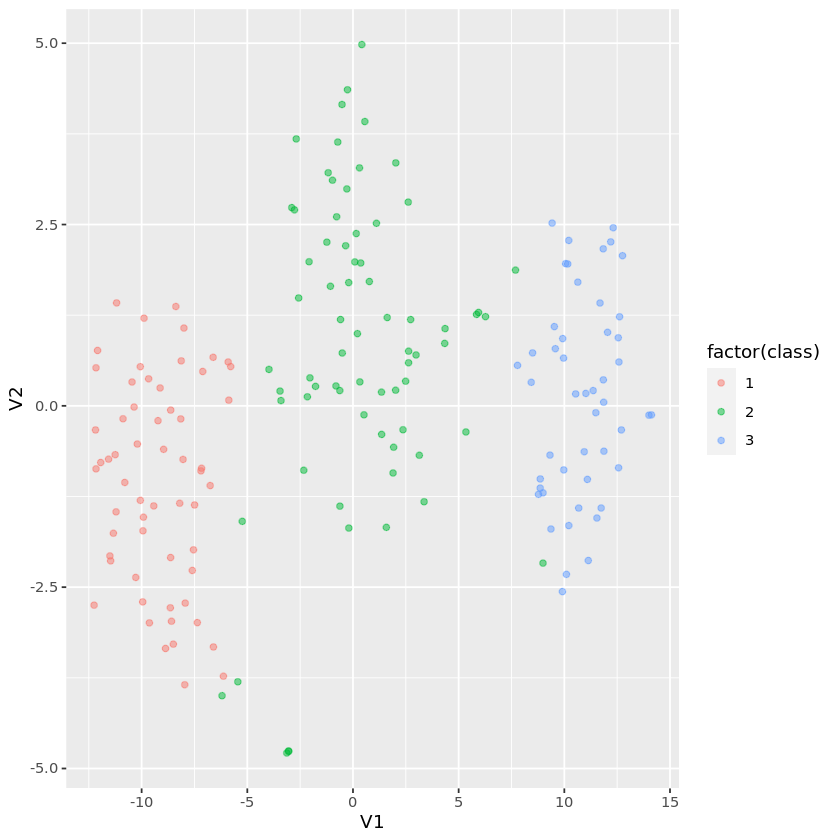

In [48]:
# 2b
tsne_plot <- as_tibble(tsne_out$Y) %>%
  mutate(class = wine$class)

print(ggplot(tsne_plot, aes(V1, V2)) +
  geom_point(aes(color=factor(class)),alpha=0.5))

